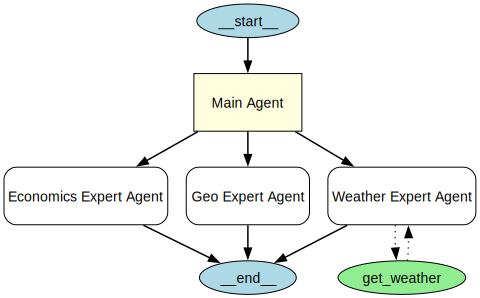

In [4]:
from agents import Agent, Runner, SQLiteSession, trace
from tools import get_weather
from agents.extensions.visualization import draw_graph
from pydantic import BaseModel

session = SQLiteSession("user_1", "ai-handoff-memory.db")

class Answer(BaseModel):
    answer: str
    background_explanation: str

geaography_agent = Agent(
    name="Geo Expert Agent",
    instructions="지리 전문가로서 지리와 관련된 질문에 답변합니다..",
    handoff_description="지리 관련 질문에 답할 때 사용하세요..",
    output_type=Answer
)

weather_agent = Agent(
    name="Weather Expert Agent",
    instructions="일기예보 전문가로서 지리와 관련된 질문에 답변합니다..",
    handoff_description="일기예보 관련 질문에 답할 때 사용하세요..",
    tools=[get_weather],
    output_type=Answer
)

economics_agent = Agent(
    name="Economics Expert Agent",
    instructions="경제 전문가로서 지리와 관련된 질문에 답변합니다..",
    handoff_description="경제 관련 질문에 답할 때 사용하세요..",
)

main_agent = Agent(
    name="Main Agent",
    instructions="사용자 대면 상담원입니다. 사용자의 질문에 가장 잘 답변할 수 있는 상담원에게 연결합니다.",
    handoffs=[
        economics_agent,
        weather_agent,
        geaography_agent,
    ],
)

draw_graph(main_agent)


In [5]:

with trace("user123"):
    result = await Runner.run(
      main_agent,
      "안녕하세요, 서울의 날씨가 어떻습니까 ?",
      session=session
    )
    result = await Runner.run(
      main_agent,
      "안녕하세요, 대전의 날씨가 어떻습니까 ?",
      session=session
    )

await session.get_items()

[{'content': '안녕하세요, 서울의 날씨가 어떻습니까 ?', 'role': 'user'},
 {'id': 'msg_68d7b0eebee08196a1fb97008fb4a72208dab0195a1b3544',
  'content': [{'annotations': [],
    'text': '안녕하세요! 현재 정보 기준으로 서울의 날씨는 계절과 날짜에 따라 달라집니다. 2024년 6월 초 기준으로 서울은 일반적으로 초여름 날씨를 보이며, 평균 기온은 낮에는 약 23~28°C, 밤에는 16~20°C 정도입니다. 최근에는 비가 자주 내릴 수 있어 습도가 높고, 간간이 맑은 날도 나타납니다.\n\n실시간 정확한 서울의 날씨 정보를 원하신다면 기상청이나 주요 날씨 앱(네이버 날씨, 윈디, AccuWeather 등)을 확인하시는 것이 좋습니다. 오늘 외출 계획이 있으시다면, 우산이나 가벼운 겉옷을 준비하시길 추천드립니다!',
    'type': 'output_text',
    'logprobs': []}],
  'role': 'assistant',
  'status': 'completed',
  'type': 'message'},
 {'content': '안녕하세요, 서울의 날씨가 어떻습니까 ?', 'role': 'user'},
 {'arguments': '{"city":"서울"}',
  'call_id': 'call_09vxc5ROGxnnMWQBC3aKAf7T',
  'name': 'get_weather',
  'type': 'function_call',
  'id': 'fc_68d7b11b90c48196bc29e88688f0621a08dab0195a1b3544',
  'status': 'completed'},
 {'call_id': 'call_09vxc5ROGxnnMWQBC3aKAf7T',
  'output': '30 degrees',
  'type': 'function_call_output'},
 {'id': 'msg_68d7b11d2afc8196ac75